In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data/AllWeathDTypes_NWPP_10yrs.csv as a dataframe
dfX = pd.read_csv("data/AllWeathDTypes_NWPP_10yrs.csv")
dfY = pd.read_csv("data/RTLoad_MIDC+NW_10yrs.csv")
#subtract 7 hours from datetime to convert from UTC to PST
dfY['datetime'] = pd.to_datetime(dfY['datetime'])
dfY['datetime'] = dfY['datetime'] - pd.Timedelta(hours=7)
dfX['datetime'] = pd.to_datetime(dfX['datetime'])
dfX['datetime'] = (dfX['datetime'] - pd.Timedelta(hours=7))

In [3]:
#data cleaning. TODO : construct a py file for this
#drop rows with temperature less than 0
dfX = dfX[dfX['temperature'] >= 0]

In [4]:
dfY

,datetime,name,avgvalue,objectid,yes_objectid,iso
0,2025-01-22 00:00:00,"Puget Sound Energy, Inc.",3735.0,L000093,10003947596,CAISO
1,2025-01-22 01:00:00,"Puget Sound Energy, Inc.",3517.0,L000093,10003947596,CAISO
2,2025-01-22 02:00:00,"Puget Sound Energy, Inc.",3403.0,L000093,10003947596,CAISO
3,2025-01-22 03:00:00,"Puget Sound Energy, Inc.",3356.0,L000093,10003947596,CAISO
4,2025-01-22 04:00:00,"Puget Sound Energy, Inc.",3358.0,L000093,10003947596,CAISO
...,...,...,...,...,...,...
533053,2017-12-07 21:00:00,Portland General Electric Company,3083.0,L000091,10003947593,CAISO
533054,2017-12-07 22:00:00,Portland General Electric Company,3024.0,L000091,10003947593,CAISO
533055,2017-12-07 23:00:00,Portland General Electric Company,2875.0,L000091,10003947593,CAISO
533056,2017-12-08 00:00:00,Portland General Electric Company,2634.0,L000091,10003947593,CAISO


In [5]:
from helpers import totalload

# Use the totalload function to calculate the total load
start_date = '2022-03-01'
end_date = '2025-08-21'
dfY = totalload(dfY, start_date, end_date)

zones added:  ['Puget Sound Energy, Inc.' 'Seattle City Light' 'Avista Corporation'
 'City of Tacoma, Department of Public Utilities'
 'Portland General Electric Company' 'PACW-TAC' 'BPA']


In [5]:
dfY.tail(20)

,Total Load
datetime,
2025-08-21 04:00:00,13429.083333
2025-08-21 05:00:00,13598.916667
2025-08-21 06:00:00,14288.750000
2025-08-21 07:00:00,15277.916667
2025-08-21 08:00:00,16122.500000
2025-08-21 09:00:00,16640.000000
2025-08-21 10:00:00,16965.500000
2025-08-21 11:00:00,17366.250000
2025-08-21 12:00:00,17813.750000


In [6]:
# Extract date and time components from the 'datetime' column
dfX['year'] = dfX['datetime'].dt.year
dfX['month'] = dfX['datetime'].dt.month
dfX['date'] = dfX['datetime'].dt.day
dfX['day'] = dfX['datetime'].dt.dayofweek
dfX['time'] = dfX['datetime'].dt.hour
dfX['temperature_spread'] = dfX['temperature_max'] - dfX['temperature_min']

In [7]:
df_XY = pd.merge(dfX, dfY, on='datetime')
df_XY.tail()

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,...,windChill,windDirection,windSpeed,year,month,date,day,time,temperature_spread,Total Load
30474,2025-08-21 19:00:00,21.0,46.0,NaN,NaN,NaN,NaN,81.0,NaN,NaN,...,82.0,335.0,9.0,2025,8,21,3,19,NaN,21445.333333
30475,2025-08-21 20:00:00,20.0,48.0,NaN,NaN,NaN,NaN,79.0,NaN,NaN,...,78.0,324.0,9.0,2025,8,21,3,20,NaN,20835.333333
30476,2025-08-21 21:00:00,20.0,48.0,NaN,NaN,NaN,NaN,75.0,NaN,NaN,...,75.0,328.0,7.0,2025,8,21,3,21,NaN,20189.250000
30477,2025-08-21 22:00:00,11.0,48.0,NaN,NaN,NaN,NaN,73.0,NaN,NaN,...,73.0,333.0,7.0,2025,8,21,3,22,NaN,19176.000000
30478,2025-08-21 23:00:00,9.0,48.0,NaN,NaN,NaN,NaN,71.0,NaN,NaN,...,71.0,350.0,6.0,2025,8,21,3,23,NaN,17641.083333


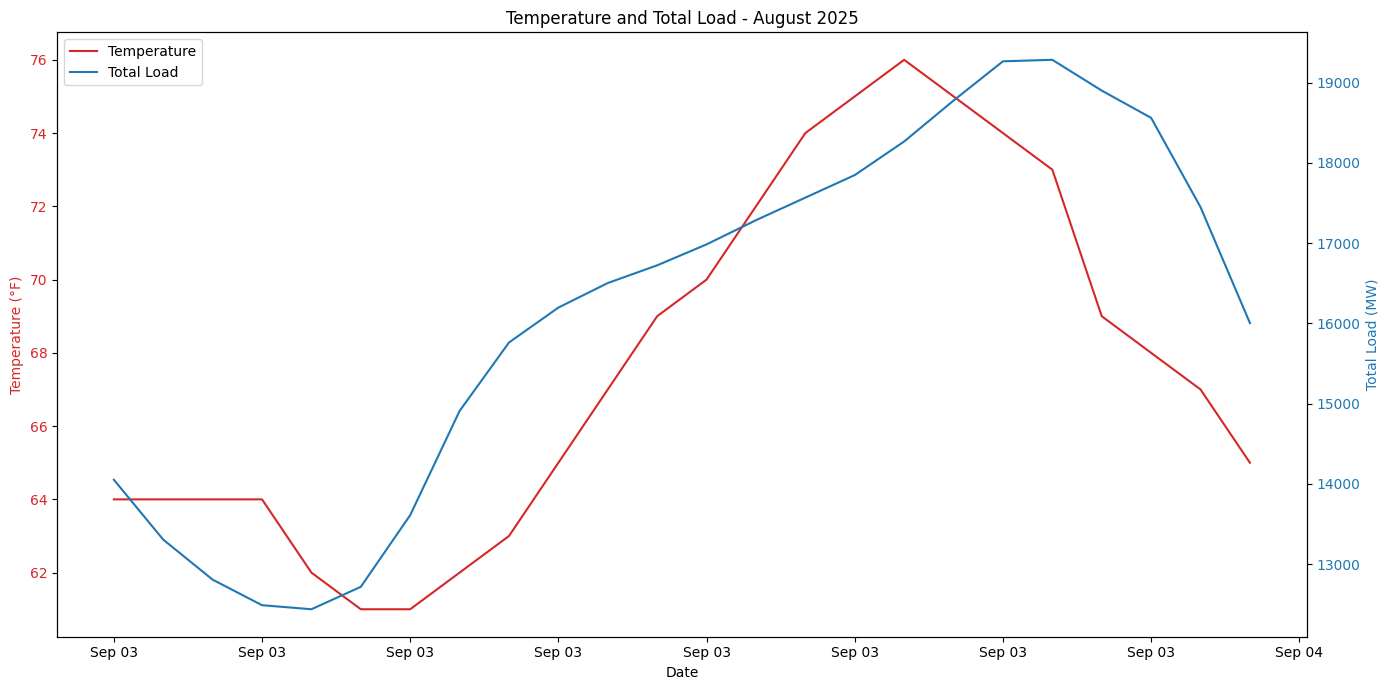

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for August 2025 data
august_data = df_XY[(df_XY['datetime'].dt.year == 2024) & 
                          (df_XY['datetime'].dt.month == 9) &
                          (df_XY['datetime'].dt.day == 3)]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot temperature on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)', color=color)
ax1.plot(august_data['datetime'], august_data['temperature'], color=color, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis and plot load
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Load (MW)', color=color)
ax2.plot(august_data['datetime'], august_data['Total Load'], color=color, label='Total Load')
ax2.tick_params(axis='y', labelcolor=color)

# Format x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

# Add title and legend
plt.title('Temperature and Total Load - August 2025')
fig.tight_layout()

# Create legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
#add x-ticks for every 3 hours
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=3))

plt.show()

In [38]:

august_data

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,...,windChill,windDirection,windSpeed,year,month,date,day,time,temperature_spread,Total Load


In [7]:
#print latest datetime in df_XY
print("Latest datetime in df_XY:", df_XY['datetime'].max())

Latest datetime in df_XY: 2025-08-21 23:00:00


In [10]:
#groupby date and get mean of each day
# df_daily = df_XY.groupby(df_XY['datetime'].dt.date).mean()

In [11]:
df_XY.head()

,datetime,cloudCover,dewpoint,electric_cdd,electric_hdd,gas_cdd,gas_hdd,heatIndex,population_cdd,population_hdd,...,windChill,windDirection,windSpeed,year,month,date,day,time,temperature_spread,Total Load
0,2022-03-02 00:00:00,77.0,42.0,NaN,NaN,NaN,NaN,49.0,NaN,NaN,...,46.0,129.0,6.0,2022,3,2,2,0,NaN,15502.000000
1,2022-03-02 01:00:00,76.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,44.0,127.0,6.0,2022,3,2,2,1,NaN,14518.250000
2,2022-03-02 02:00:00,81.0,42.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,44.0,121.0,5.0,2022,3,2,2,2,NaN,13943.250000
3,2022-03-02 03:00:00,86.0,43.0,NaN,NaN,NaN,NaN,47.0,NaN,NaN,...,44.0,104.0,6.0,2022,3,2,2,3,NaN,13651.666667
4,2022-03-02 04:00:00,85.0,42.0,NaN,NaN,NaN,NaN,46.0,NaN,NaN,...,45.0,144.0,3.0,2022,3,2,2,4,NaN,13507.416667



R-squared on training data: 0.9424
R-squared on test data: 0.9419


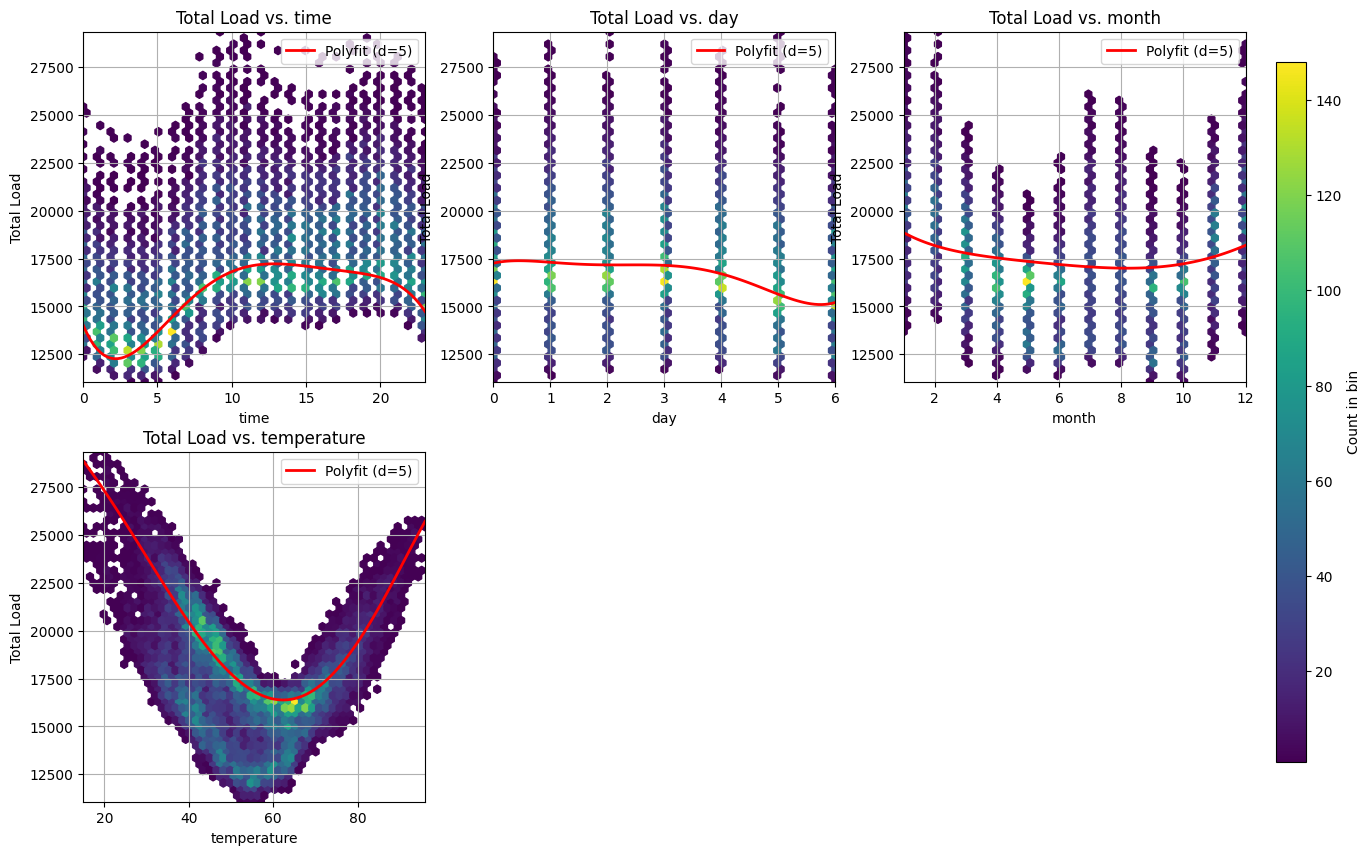

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 1. Feature Engineering and Selection
features = ['time', 'day', 'month', 'temperature']
target = 'Total Load'

X = df_XY[features]
y = df_XY[target]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Polynomial Regression
poly_degree = 5
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)


train_r2 = model.score(X_train_poly, y_train)
test_r2 = model.score(X_test_poly, y_test)

print(f"\nR-squared on training data: {train_r2:.4f}")
print(f"R-squared on test data: {test_r2:.4f}")

# 6. Visualization
# Create a figure with subplots for each feature
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# To plot the effect of each feature, we hold other features at their mean
X_train_scaled_mean = X_train_scaled.mean(axis=0)

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Generate a range of values for the current feature
    feature_col_index = X_train.columns.get_loc(feature)
    feature_range_scaled = np.linspace(X_train_scaled[:, feature_col_index].min(), X_train_scaled[:, feature_col_index].max(), 100)
    
    # Create a test set where only the current feature varies
    plot_X_scaled = np.tile(X_train_scaled_mean, (100, 1))
    plot_X_scaled[:, feature_col_index] = feature_range_scaled
    
    # Transform for polynomial prediction
    plot_X_poly = poly.transform(plot_X_scaled)
    
    # Predict
    y_pred_plot = model.predict(plot_X_poly)
    
    # Inverse transform the feature values to their original scale for plotting
    feature_range_original = scaler.inverse_transform(plot_X_scaled)[:, feature_col_index]
    
    # Sort values for a smooth line plot
    sort_indices = np.argsort(feature_range_original)
    
    # Density plot (hexbin) of original data
    hb = ax.hexbin(X_train[feature], y_train, gridsize=50, cmap='viridis', mincnt=1)
    
    # Plot the polynomial curve
    ax.plot(feature_range_original[sort_indices], y_pred_plot[sort_indices], color='red', linewidth=2, label=f'Polyfit (d={poly_degree})')
    
    # Set x and y limits based on the data range
    ax.set_xlim(X_train[feature].min(), X_train[feature].max())
    ax.set_ylim(y_train.min(), y_train.max())
    
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{target} vs. {feature}')
    ax.legend()
    ax.grid(True)

# Add a common colorbar for all hexbin plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(hb, cax=cbar_ax, label='Count in bin')

# Hide any unused subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# Prepare features and target
features = ['time', 'day', 'month', 'temperature']
target = 'Total Load'
X_xgb = df_XY[features]
y_xgb = df_XY[target]

# Split into train/test
# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_scores = []

for train_idx, test_idx in kf.split(X_xgb):
    X_train_xgb, X_test_xgb = X_xgb.iloc[train_idx], X_xgb.iloc[test_idx]
    y_train_xgb, y_test_xgb = y_xgb.iloc[train_idx], y_xgb.iloc[test_idx]
    
    # Train XGBoost regressor with default/best params for each fold
    model = xgb.XGBRegressor(**param_grid[-1], random_state=42)
    model.fit(X_train_xgb, y_train_xgb)
    y_pred = model.predict(X_test_xgb)
    r2 = r2_score(y_test_xgb, y_pred)
    cv_r2_scores.append(r2)

print(f"Cross-validated R2 scores: {cv_r2_scores}")
print(f"Mean CV R2: {np.mean(cv_r2_scores):.4f}")

# Train XGBoost regressor
# Try different hyperparameters and keep track of the best test R2 score
best_r2 = -np.inf
best_params = None
param_grid = [
    {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05},
    {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1},
    {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05},
]

for params in param_grid:
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train_xgb, y_train_xgb)
    y_pred = model.predict(X_test_xgb)
    r2 = r2_score(y_test_xgb, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_params = params

print(f"Best XGBoost test R2: {best_r2:.4f} with params: {best_params}")

# Use the best model for further steps
xgb_model = xgb.XGBRegressor(**best_params, random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_xgb)
mse = mean_squared_error(y_test_xgb, y_pred_xgb)
r2 = r2_score(y_test_xgb, y_pred_xgb)

mae = mean_absolute_error(y_test_xgb, y_pred_xgb)
avg_test_y = y_test_xgb.mean()
mae_pct = mae / avg_test_y * 100

print(f"XGBoost Test MAE/Avg: {mae_pct:.4f}")
print(f"XGBoost Test R2: {r2:.4f}")

Best XGBoost test R2: 0.9639 with params: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05}
XGBoost Test MAE/Avg: 2.4343
XGBoost Test R2: 0.9639


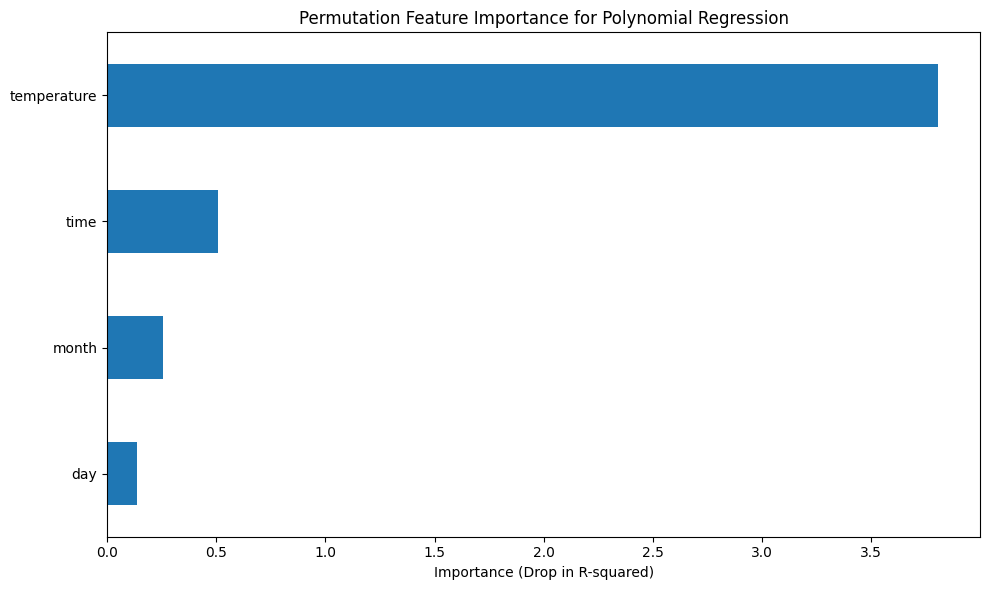

Feature Importances (summed from polynomial terms):
temperature    3.808339
time           0.506633
month          0.253503
day            0.137302
dtype: float64


In [13]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance on the test set
# We use the test set to see how important features are for making predictions on unseen data.
# The polynomial features (X_test_poly) and corresponding target values (y_test) are used.
result = permutation_importance(
    model, X_test_poly, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# The result gives importance for each polynomial feature. We need to map this back to the original features.
# We can do this by summing the importances of all polynomial terms that include a given original feature.
original_feature_importance = np.zeros(len(features))
poly_feature_names = poly.get_feature_names_out(features)

for i, feature in enumerate(features):
    # Find all polynomial features that contain the original feature
    indices = [j for j, name in enumerate(poly_feature_names) if feature in name.split()]
    # Sum the importances of these polynomial features
    original_feature_importance[i] = result.importances_mean[indices].sum()

# Create a pandas Series for easier plotting and viewing
importance_df = pd.Series(original_feature_importance, index=features)

# Sort the features by importance
sorted_importance = importance_df.sort_values(ascending=True)

# Plotting the feature importances
fig, ax = plt.subplots(figsize=(10, 6))
sorted_importance.plot(kind='barh', ax=ax)
ax.set_title('Permutation Feature Importance for Polynomial Regression')
ax.set_xlabel('Importance (Drop in R-squared)')
plt.tight_layout()
plt.show()

print("Feature Importances (summed from polynomial terms):")
print(sorted_importance.sort_values(ascending=False))

In [11]:
# Predict on the test data
y_pred_test = model.predict(X_test_poly)

# Create a new dataframe with the test data, actual load, and predicted load
df_results = X_test.copy()
df_results['Actual Load'] = y_test
df_results['Predicted Load'] = y_pred_test

# Display the first few rows of the results dataframe
df_results.head(30)

,time,day,month,temperature,Actual Load,Predicted Load
4596,12,4,9,72.0,16461.583333,16453.216883
25405,13,3,1,39.0,22990.333333,22413.359203
8957,5,4,3,40.0,16751.666667,16682.167754
8870,14,0,3,45.0,19808.750000,20302.751225
96,0,6,3,39.0,16791.666667,18324.767564
16586,2,0,1,42.0,16656.666667,14831.449488
24529,1,2,12,47.0,17013.750000,15311.719629
12524,20,5,8,74.0,17485.416667,17751.877123
3473,17,6,7,85.0,20215.333333,20130.165026
15505,1,4,12,39.0,17339.000000,17476.229274


In [12]:
#find average load and the mean absolute error
df_results['Absolute Error'] = np.abs(df_results['Actual Load'] - df_results['Predicted Load'])
average_load = df_results['Actual Load'].mean()
mean_absolute_error = df_results['Absolute Error'].mean()
error_percentage = (mean_absolute_error / average_load) * 100

print("Average Load:", average_load)
print("Mean Absolute Error:", mean_absolute_error)
print("Error Percentage:", error_percentage)


Average Load: 17163.780221509653
Mean Absolute Error: 545.5013408694425
Error Percentage: 3.1782121061292785


In [18]:
import joblib
#save model and scaler as a dictionary
model_and_scaler = {
    'model': model,
    'scaler': scaler,
    'poly': poly
}
joblib.dump(model_and_scaler, 'models/Reg1modelscalerpoly.pkl')


['models/Reg1modelscalerpoly.pkl']


R-squared on training data: 0.9507
R-squared on test data: 0.9493


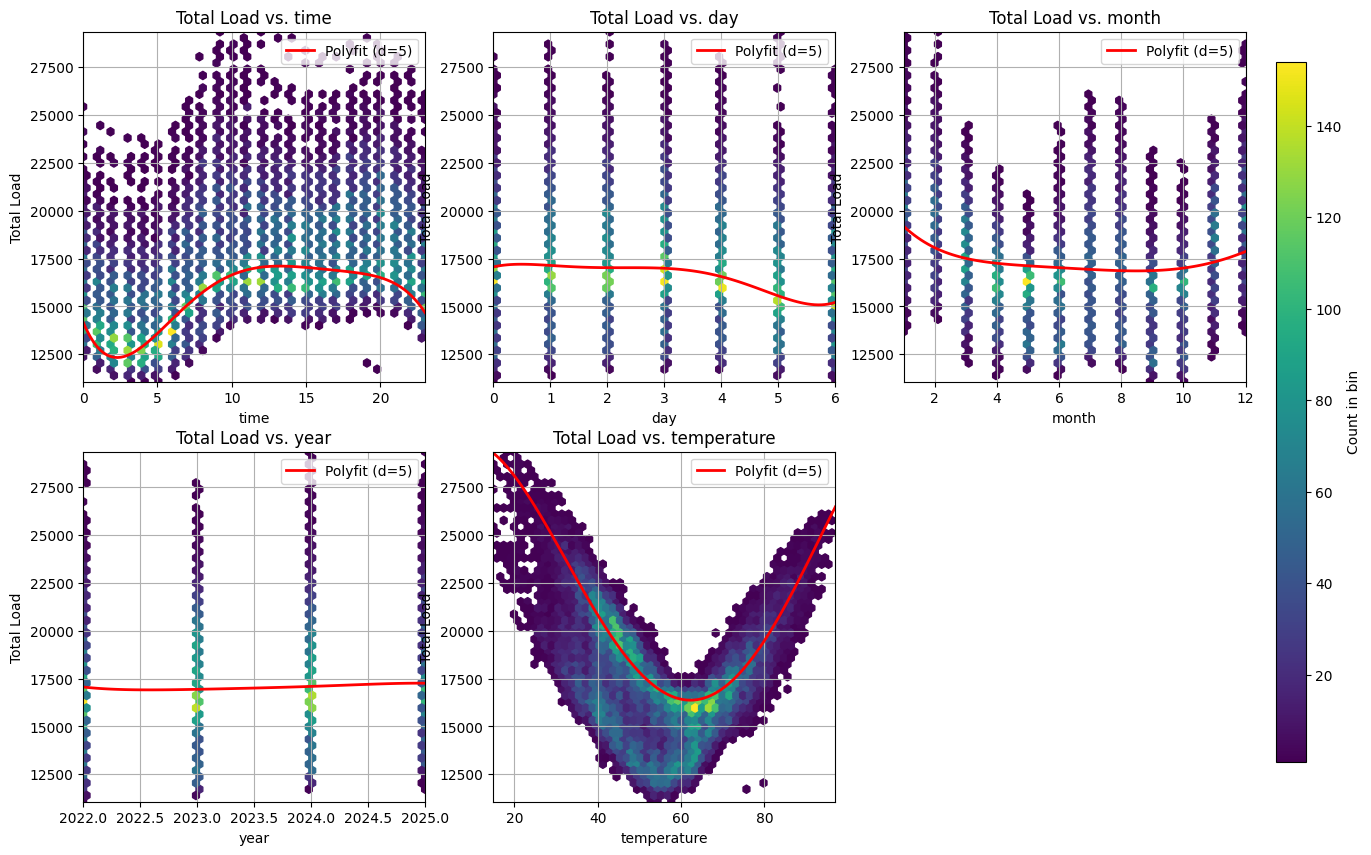

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# 1. Feature Engineering and Selection
features = ['time', 'day', 'month', 'year', 'temperature']
target = 'Total Load'

X = df_XY[features]
y = df_XY[target]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Polynomial Regression
poly_degree = 5
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the model
model = LinearRegression()
model.fit(X_train_poly, y_train)


train_r2 = model.score(X_train_poly, y_train)
test_r2 = model.score(X_test_poly, y_test)

print(f"\nR-squared on training data: {train_r2:.4f}")
print(f"R-squared on test data: {test_r2:.4f}")

# 6. Visualization
# Create a figure with subplots for each feature
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# To plot the effect of each feature, we hold other features at their mean
X_train_scaled_mean = X_train_scaled.mean(axis=0)

for i, feature in enumerate(features):
    ax = axes[i]
    
    # Generate a range of values for the current feature
    feature_col_index = X_train.columns.get_loc(feature)
    feature_range_scaled = np.linspace(X_train_scaled[:, feature_col_index].min(), X_train_scaled[:, feature_col_index].max(), 100)
    
    # Create a test set where only the current feature varies
    plot_X_scaled = np.tile(X_train_scaled_mean, (100, 1))
    plot_X_scaled[:, feature_col_index] = feature_range_scaled
    
    # Transform for polynomial prediction
    plot_X_poly = poly.transform(plot_X_scaled)
    
    # Predict
    y_pred_plot = model.predict(plot_X_poly)
    
    # Inverse transform the feature values to their original scale for plotting
    feature_range_original = scaler.inverse_transform(plot_X_scaled)[:, feature_col_index]
    
    # Sort values for a smooth line plot
    sort_indices = np.argsort(feature_range_original)
    
    # Density plot (hexbin) of original data
    hb = ax.hexbin(X_train[feature], y_train, gridsize=50, cmap='viridis', mincnt=1)
    
    # Plot the polynomial curve
    ax.plot(feature_range_original[sort_indices], y_pred_plot[sort_indices], color='red', linewidth=2, label=f'Polyfit (d={poly_degree})')
    
    # Set x and y limits based on the data range
    ax.set_xlim(X_train[feature].min(), X_train[feature].max())
    ax.set_ylim(y_train.min(), y_train.max())
    
    ax.set_xlabel(feature)
    ax.set_ylabel(target)
    ax.set_title(f'{target} vs. {feature}')
    ax.legend()
    ax.grid(True)

# Add a common colorbar for all hexbin plots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(hb, cax=cbar_ax, label='Count in bin')

# Hide any unused subplots
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# plt.tight_layout()
plt.show()

In [9]:
# Predict on the test data
y_pred_test = model.predict(X_test_poly)

# Create a new dataframe with the test data, actual load, and predicted load
df_results = X_test.copy()
df_results['Actual Load'] = y_test
df_results['Predicted Load'] = y_pred_test

# Display the first few rows of the results dataframe
print(df_results[df_results['month']==8].head(30))
#find average load and the mean absolute error
df_results['Absolute Error'] = np.abs(df_results['Actual Load'] - df_results['Predicted Load'])
average_load = df_results['Actual Load'].mean()
mean_absolute_error = df_results['Absolute Error'].mean()
error_percentage = (mean_absolute_error / average_load) * 100

print("Average Load:", average_load)
print("Mean Absolute Error:", mean_absolute_error)
print("Error Percentage:", error_percentage)

       time  day  month  year  temperature   Actual Load  Predicted Load
30270     7    2      8  2025         66.0  16622.833333    15921.885485
4120     16    4      8  2022         82.0  21048.500000    19634.673954
12896     8    6      8  2023         62.0  13025.000000    13484.662674
30357    22    5      8  2025         67.0  17035.666667    16462.018911
21661    13    0      8  2024         76.0  17635.916667    18259.599299
3778     10    4      8  2022         69.0  16293.000000    16380.790234
4391     23    1      8  2022         75.0  17833.416667    19042.589673
21890     2    3      8  2024         57.0  12885.750000    12534.817971
13083     3    0      8  2023         65.0  12692.750000    12710.412860
12806    14    2      8  2023         90.0  23951.750000    22690.672556
30287     0    3      8  2025         69.0  17091.833333    16923.826956
12525    21    4      8  2023         75.0  18897.083333    19091.266192
12715    19    5      8  2023         82.0  20151.5

Prediction on forecast data


In [13]:
#import data\8-31to9-10_RTLoad_midC.xls and data\8-31to9-10_Weath_midC.xls
RTL_forecast = pd.read_excel("data/8-31to9-10_RTLoad_midC.xls")
Temp_forecast = pd.read_excel("data/8-31to9-10_Weath_midC.xlsx",skiprows=1)

In [14]:
# Prepare features and target for prediction on forecast data

# Ensure datetime columns are in datetime format
RTL_forecast['datetime'] = pd.to_datetime(RTL_forecast['datetime']) - pd.Timedelta(hours=3)
Temp_forecast['datetime'] = pd.to_datetime(Temp_forecast['Date'])+ pd.to_timedelta(Temp_forecast['Hour'], unit='h') + pd.Timedelta(hours=1)
# Merge Temp_forecast and RTL_forecast on date and hour
Temp_forecast['time'] = Temp_forecast['Hour']
Temp_forecast['year'] = Temp_forecast['datetime'].dt.year
Temp_forecast['month'] = Temp_forecast['datetime'].dt.month
Temp_forecast['day'] = Temp_forecast['datetime'].dt.dayofweek


# Merge temperature and load forecasts on datetime
df_forecast = pd.merge(Temp_forecast, RTL_forecast, on='datetime', how='inner')
#rename Temp (C) column to temperature
#convert "temp (C)" column values fro celcius to fahrenheit
df_forecast['Temp (C)'] = df_forecast['Temp (C)'] * 9/5 + 32
df_forecast.rename(columns={'Temp (C)': 'temperature', 'Total': 'Total Load'}, inplace=True)
#drop nans from ['time', 'day', 'month', 'year', 'temperature', 'Total Load']
df_forecast = df_forecast.dropna(subset=['time', 'day', 'month', 'year', 'temperature', 'Total Load'])
# Prepare features and target
X_forecast = df_forecast[['time', 'day', 'month', 'year', 'temperature']]
y_forecast = df_forecast['Total Load']

In [17]:
df_forecast.tail()

,Date,Hour,temperature,Dew Point (C),Wind Chill (C),Heat Index (C),Wind Speed (kph),Wind Dir,RH,Cloud Cover,...,month,day,Avista Corporation (RTLOAD) Average,"City of Tacoma, Department of Public Utilities (RTLOAD) Average","Puget Sound Energy, Inc. (RTLOAD) Average",Seattle City Light (RTLOAD) Average,Portland General Electric Company (RTLOAD) Average,BPA (RTLOAD) Average,PACW-TAC (RTLOAD) Average,Total Load
273,2025-09-11,9,62.96,11.0,17.2,17.2,9.5,224.244995,74,0.77,...,9,3,1208.0,436.0,2567.0,993.0,2708.0,6440.166667,2395.0,16747.166667
274,2025-09-11,10,64.22,11.0,17.9,17.9,10.5,213.951004,71,0.76,...,9,3,1239.0,447.0,2611.0,1015.0,2742.0,6470.166667,2429.0,16953.166667
275,2025-09-11,11,65.48,10.9,18.6,18.6,10.7,244.860992,69,0.76,...,9,3,1297.0,455.0,2633.0,1024.0,2760.0,6499.666667,2443.0,17111.666667
276,2025-09-11,12,67.28,10.4,19.6,19.6,10.1,200.994995,64,0.74,...,9,3,1356.0,462.0,2643.0,1032.0,2761.0,6541.500000,2461.0,17256.500000
277,2025-09-11,13,69.08,10.2,20.6,20.6,9.4,196.843994,59,0.73,...,9,3,NaN,NaN,NaN,NaN,NaN,6578.583333,NaN,NaN


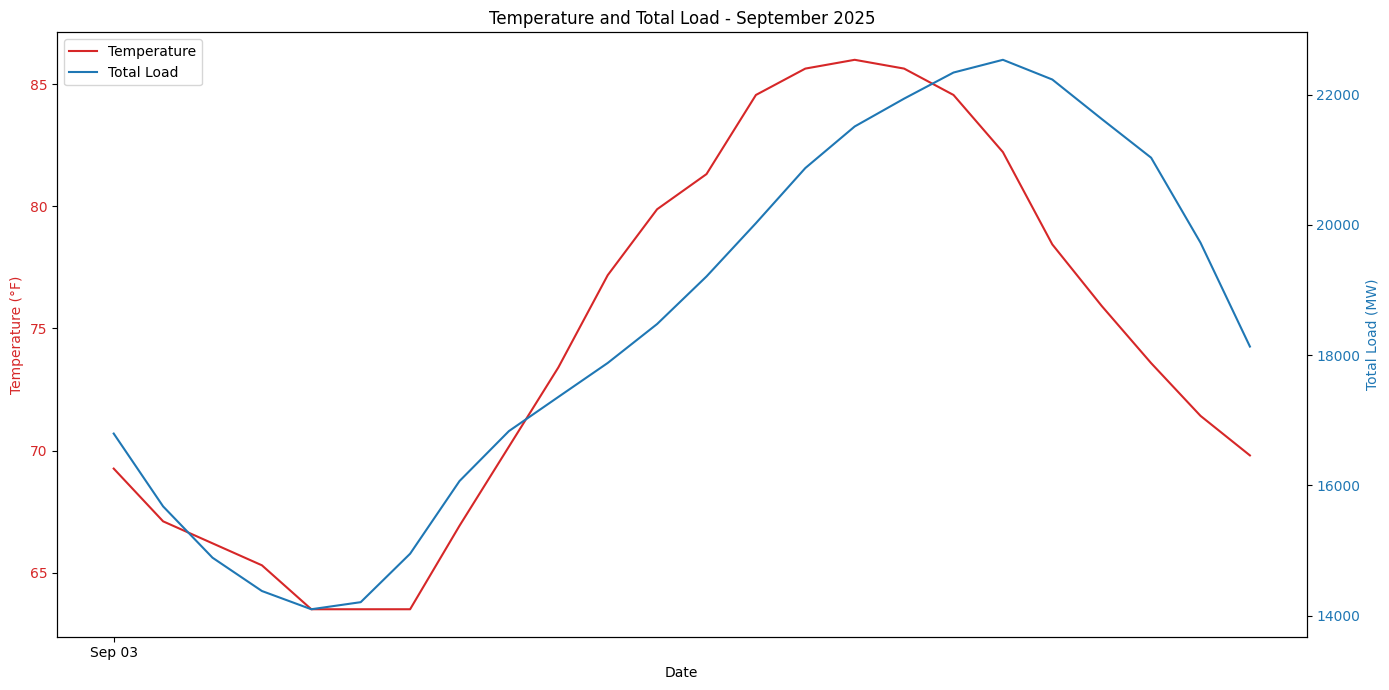

In [84]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for September 2025 data
september_data = df_forecast[(df_forecast['datetime'].dt.year == 2025) & 
                          (df_forecast['datetime'].dt.month == 9) &
                          (df_forecast['datetime'].dt.day == 3)]

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot temperature on primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)', color=color)
ax1.plot(september_data['datetime'], september_data['temperature'], color=color, label='Temperature')
ax1.tick_params(axis='y', labelcolor=color)

# Create secondary y-axis and plot load
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Load (MW)', color=color)
ax2.plot(september_data['datetime'], september_data['Total Load'], color=color, label='Total Load')
ax2.tick_params(axis='y', labelcolor=color)

# Format x-axis to show dates nicely
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

# Add title and legend
plt.title('Temperature and Total Load - September 2025')
fig.tight_layout()

# Create legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

NameError: name 'august_data' is not defined

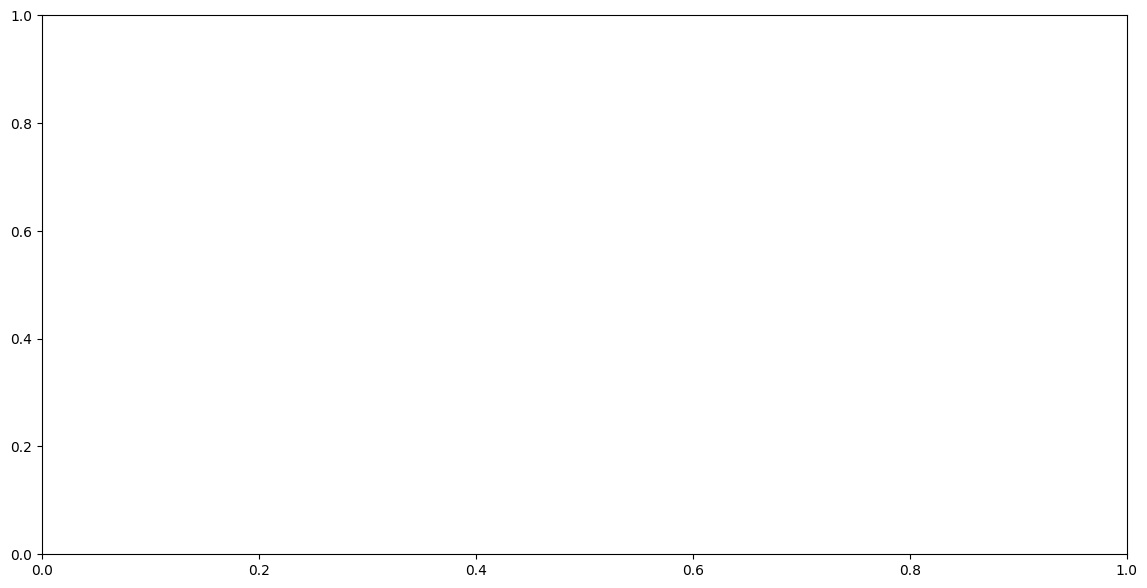

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot August and September forecast data for comparison
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot temperature for August
ax1.plot(august_data['datetime'], august_data['temperature'], color='tab:red', label='August Temperature')
# Plot temperature for September
ax1.plot(september_data['datetime'], september_data['temperature'], color='tab:orange', label='September Temperature')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create secondary y-axis for Total Load
ax2 = ax1.twinx()
ax2.plot(august_data['datetime'], august_data['Total Load'], color='tab:blue', label='August Total Load')
ax2.plot(september_data['datetime'], september_data['Total Load'], color='tab:cyan', label='September Total Load')
ax2.set_ylabel('Total Load (MW)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45)

# Title and legends
plt.title('Temperature and Total Load: August vs September 2025')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.show()

In [16]:
#tell me number of nans in y_forecast
y_forecast.isna().sum()

np.int64(1)

In [15]:


# Standardize and transform features
X_forecast_scaled = scaler.transform(X_forecast)
X_forecast_poly = poly.transform(X_forecast_scaled)

# Make predictions
y_pred_forecast = model.predict(X_forecast_poly)

# Calculate error metrics
mae = np.mean(np.abs(y_forecast - y_pred_forecast))
avg_load = y_forecast.mean()
mae_pct = (mae / avg_load) * 100
r2 = r2_score(y_forecast, y_pred_forecast)

print(f"Forecast MAE: {mae:.2f}")
print(f"Forecast MAE / Avg Load: {mae_pct:.2f}%")
print(f"Forecast R2: {r2:.4f}")

Forecast MAE: 746.20
Forecast MAE / Avg Load: 4.43%
Forecast R2: 0.8672


In [16]:
#construct df_results_forecast
df_results_forecast = X_forecast.copy()
df_results_forecast['Actual Load'] = y_forecast
df_results_forecast['Predicted Load'] = y_pred_forecast
df_results_forecast['Absolute Error'] = np.abs(df_results_forecast['Actual Load'] - df_results_forecast['Predicted Load'])

In [22]:
df_results_forecast.head()

,time,day,month,year,temperature,Actual Load,Predicted Load,Absolute Error
0,0,6,8,2025,64.76,15117.583333,15734.331735,616.748402
1,1,6,8,2025,63.32,14262.750000,14004.683412,258.066588
2,2,6,8,2025,62.96,13631.250000,13171.880899,459.369101
3,3,6,8,2025,62.42,13205.833333,12817.813897,388.019436
4,4,6,8,2025,61.52,12949.583333,12758.015296,191.568037


In [34]:
Temp_forecast

,Date,Hour,Temp (C),Dew Point (C),Wind Chill (C),Heat Index (C),Wind Speed (kph),Wind Dir,RH,Cloud Cover,Precip (in),time,year,month,day,datetime
0,2025-08-31,0,18.2,11.4,18.2,18.2,6.8,337.528992,69,0.50,0.0,0,2025,8,6,2025-08-31 00:00:00
1,2025-08-31,1,17.4,11.1,17.4,17.4,8.1,338.984009,71,0.48,0.0,1,2025,8,6,2025-08-31 01:00:00
2,2025-08-31,2,17.2,11.2,17.2,17.2,8.1,351.756012,71,0.45,0.0,2,2025,8,6,2025-08-31 02:00:00
3,2025-08-31,3,16.9,11.2,16.9,16.9,8.4,38.633801,73,0.35,0.0,3,2025,8,6,2025-08-31 03:00:00
4,2025-08-31,4,16.4,11.0,16.4,16.4,7.2,78.041298,74,0.23,0.0,4,2025,8,6,2025-08-31 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2025-09-11,9,17.2,11.0,17.2,17.2,9.5,224.244995,74,0.77,0.0,9,2025,9,3,2025-09-11 09:00:00
274,2025-09-11,10,17.9,11.0,17.9,17.9,10.5,213.951004,71,0.76,0.0,10,2025,9,3,2025-09-11 10:00:00
275,2025-09-11,11,18.6,10.9,18.6,18.6,10.7,244.860992,69,0.76,0.0,11,2025,9,3,2025-09-11 11:00:00
276,2025-09-11,12,19.6,10.4,19.6,19.6,10.1,200.994995,64,0.74,0.0,12,2025,9,3,2025-09-11 12:00:00


In [22]:
RTL_forecast

,datetime,Avista Corporation (RTLOAD) Average,"City of Tacoma, Department of Public Utilities (RTLOAD) Average","Puget Sound Energy, Inc. (RTLOAD) Average",Seattle City Light (RTLOAD) Average,Portland General Electric Company (RTLOAD) Average,BPA (RTLOAD) Average,PACW-TAC (RTLOAD) Average,Total
0,2025-08-31 01:00:00,1334.0,429.0,2602.0,951.0,2758.0,6487.583333,2553.0,17114.583333
1,2025-08-31 02:00:00,1216.0,402.0,2446.0,912.0,2642.0,6158.666667,2366.0,16142.666667
2,2025-08-31 03:00:00,1112.0,375.0,2270.0,861.0,2499.0,5812.583333,2188.0,15117.583333
3,2025-08-31 04:00:00,1028.0,350.0,2112.0,812.0,2372.0,5533.750000,2055.0,14262.750000
4,2025-08-31 05:00:00,972.0,333.0,1991.0,774.0,2262.0,5339.250000,1960.0,13631.250000
...,...,...,...,...,...,...,...,...,...
276,2025-09-11 13:00:00,1239.0,447.0,2611.0,1015.0,2742.0,6470.166667,2429.0,16953.166667
277,2025-09-11 14:00:00,1297.0,455.0,2633.0,1024.0,2760.0,6499.666667,2443.0,17111.666667
278,2025-09-11 15:00:00,1356.0,462.0,2643.0,1032.0,2761.0,6541.500000,2461.0,17256.500000
279,2025-09-11 16:00:00,NaN,NaN,NaN,NaN,NaN,6578.583333,NaN,NaN
